In [ ]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.pyplot import bar, plot, show
from sklearn.metrics import precision_recall_curve, confusion_matrix

In [ ]:
# Loading data using Pandas
data = pd.read_csv("/content/drive/MyDrive/water_potability.csv")

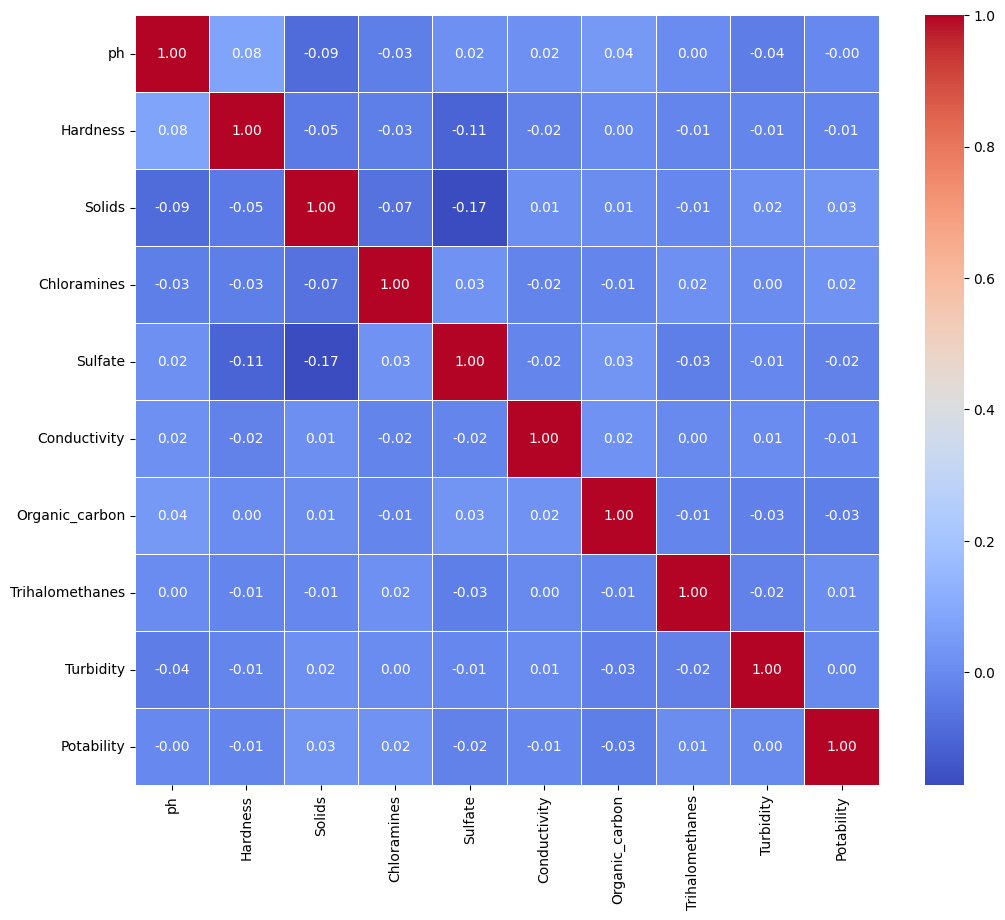

          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
..       ...         ...           ...          ...         ...           ...   
95  6.140878  197.876090  26687.874483     7.587196  329.231853    548.072761   
96  7.077874  220.670540  23873.378210     6.181840  341.987234    333.050786   
97  5.488314  135.802362  21485.153195     8.187416  280.603287    441.331137   
98  7.205559  120.327615  24627.867560     6.202469  289.768697    418.433290   
99  9.177870  163.274828  20868.331219     7.726040  320.421432    426.994393   

    Organic_carbon  Trihalo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

# Printing the first 100 rows to see the data
print(data.head(100))

In [ ]:
# Showing Null Values
missing_values = data.isnull().sum()
print(f"Missing values before imputing:\n{missing_values}")

Missing values before imputing:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
# Handling Null Values
imputer = SimpleImputer(strategy="mean")
data = imputer.fit_transform(data)
target_variable = data[:, -1]
features = data[:, :-1]
# Scaling Numerical Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Combining preprocessed features and target variable
preprocessed_data = np.concatenate((scaled_features, target_variable[:, np.newaxis]), axis=1)

Class imbalance ratio: 1.5634


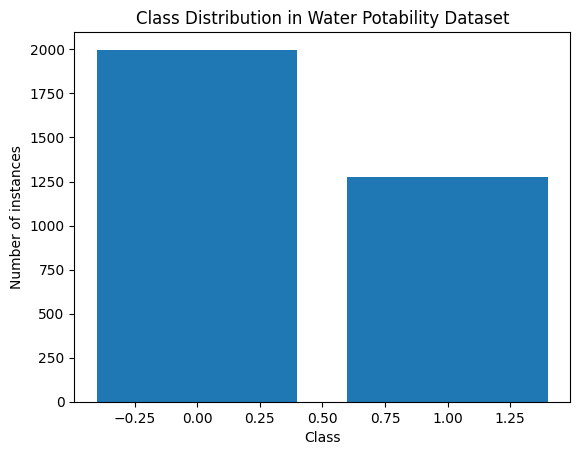

In [ ]:
# Counting class frequencies
class_counts = Counter(target_variable)

# Calculating and printing class imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Class imbalance ratio: {imbalance_ratio:.4f}")

# Visualizing class distribution

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class")
plt.ylabel("Number of instances")
plt.title("Class Distribution in Water Potability Dataset")
plt.show()

# Here the minority class (potable water) is only 33.33% of the total data.

In [ ]:
# Printing the shape of preprocessed data
print(f"Preprocessed data shape: {preprocessed_data.shape}")

#Printing the first few rows
print(f"First 5 rows of preprocessed data:\n{preprocessed_data[:5]}")

Preprocessed data shape: (3276, 10)
First 5 rows of preprocessed data:
[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01  1.12414846e-01
   9.61357416e-01  1.70895423e+00 -1.18065057e+00  1.30614943e+00
  -1.28629758e+00  0.00000000e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 -3.07693708e-01
   3.14598714e-15  2.06257500e+00  2.70597240e-01 -6.38479983e-01
   6.84217891e-01  0.00000000e+00]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01  1.36059386e+00
   3.14598714e-15 -9.40321148e-02  7.81116857e-01  1.50940884e-03
  -1.16736546e+00  0.00000000e+00]
 [ 8.40950402e-01  5.47651374e-01  4.93304442e-04  5.92007821e-01
   6.39518996e-01 -7.78829962e-01  1.25513443e+00  2.15287376e+00
   8.48411520e-01  0.00000000e+00]
 [ 1.36856889e+00 -4.64429087e-01 -4.60248570e-01 -3.63697933e-01
  -6.54176512e-01 -3.43938909e-01 -8.24357169e-01 -2.18159864e+00
   1.38785531e-01  0.00000000e+00]]


In [ ]:
# Defining the stratified split object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Performing stratified split
for train_index, test_index in strat_split.split(features, target_variable):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target_variable[train_index], target_variable[test_index]


In [ ]:
# Handling imbalance dataset through SMOTE Oversampling
# Define SMOTE object
smote = SMOTE()

# Apply SMOTE to oversample data
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
#Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
# Calculate and print metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")

Logistic Regression Accuracy: 0.5229
Logistic Regression Precision: 0.4140
Logistic Regression Recall: 0.5405


In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
# Calculate and print metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")

Random Forest Accuracy: 0.6551373346897253
Random Forest Precision: 0.5675
Random Forest Recall: 0.4830


In [ ]:
#XGBoost
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
# Calculate and print metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")

XGBoost Accuracy: 0.6134282807731435
XGBoost Precision: 0.5041
XGBoost Recall: 0.4804


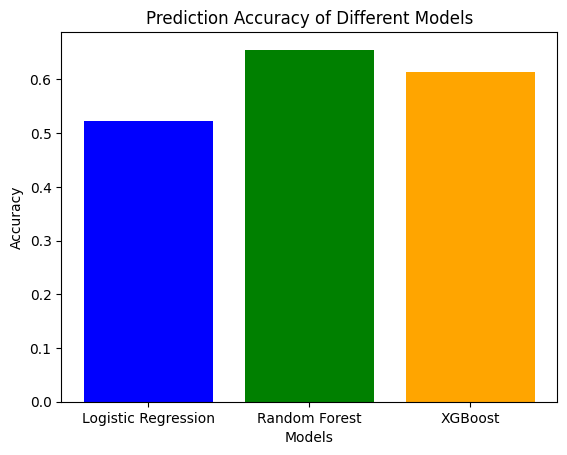

In [ ]:
# Bar Chart of accuracy for all three models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [accuracy_lr, accuracy_rf, accuracy_xgb]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')
plt.show()

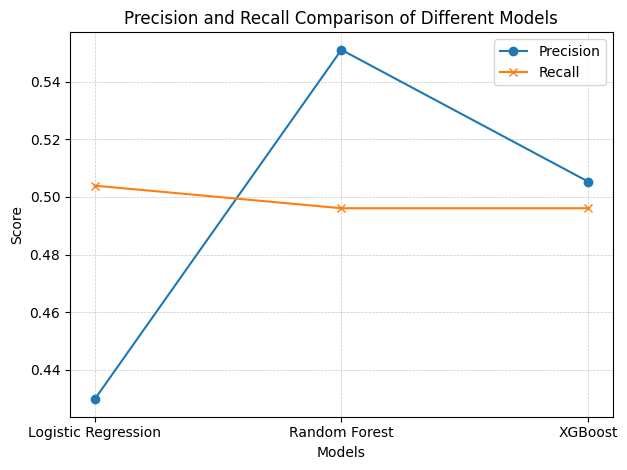

In [ ]:
# Precision and Recall Comparison of Different Models
plt.figure()
plt.plot(models, precisions, marker='o', label='Precision')
plt.plot(models, recalls, marker='x', label='Recall')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison of Different Models')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

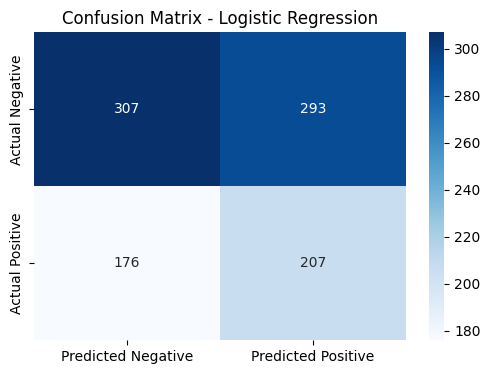

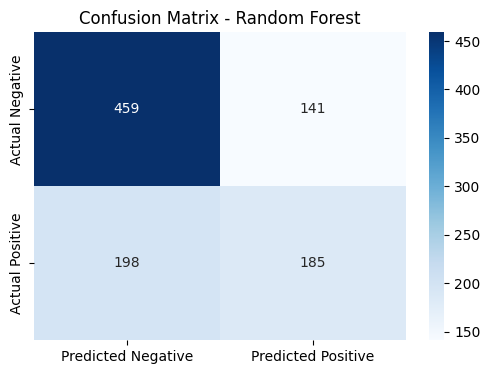

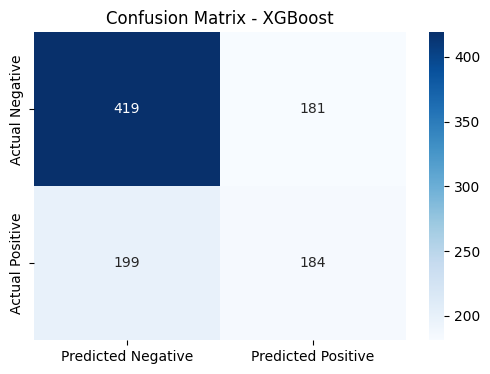

In [ ]:
# Confusion Matrix for all three models
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
